#  Face and Eye Detection with HAAR Cascade Classifiers


In [ ]:
#download files

import numpy as np
import cv2
import urllib.request

# Download the image from the URL
url = 'https://raw.githubusercontent.com/PacktPublishing/Hands-On-Computer-Vision-with-OpenCV-4-Keras-and-TensorFlow-2/master/Section%203/images/myself.jpg'
urllib.request.urlretrieve(url, 'myself.jpg')

url2='https://raw.githubusercontent.com/PacktPublishing/Hands-On-Computer-Vision-with-OpenCV-4-Keras-and-TensorFlow-2/master/Section%203/Haarcascades/haarcascade_frontalface_default.xml'

urllib.request.urlretrieve(url2, 'haarcascade_frontalface_default.xml')

('haarcascade_frontalface_default.xml',
 <http.client.HTTPMessage at 0x78185113d630>)

<>:17: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:17: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-15-6ead14669bda>:17: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


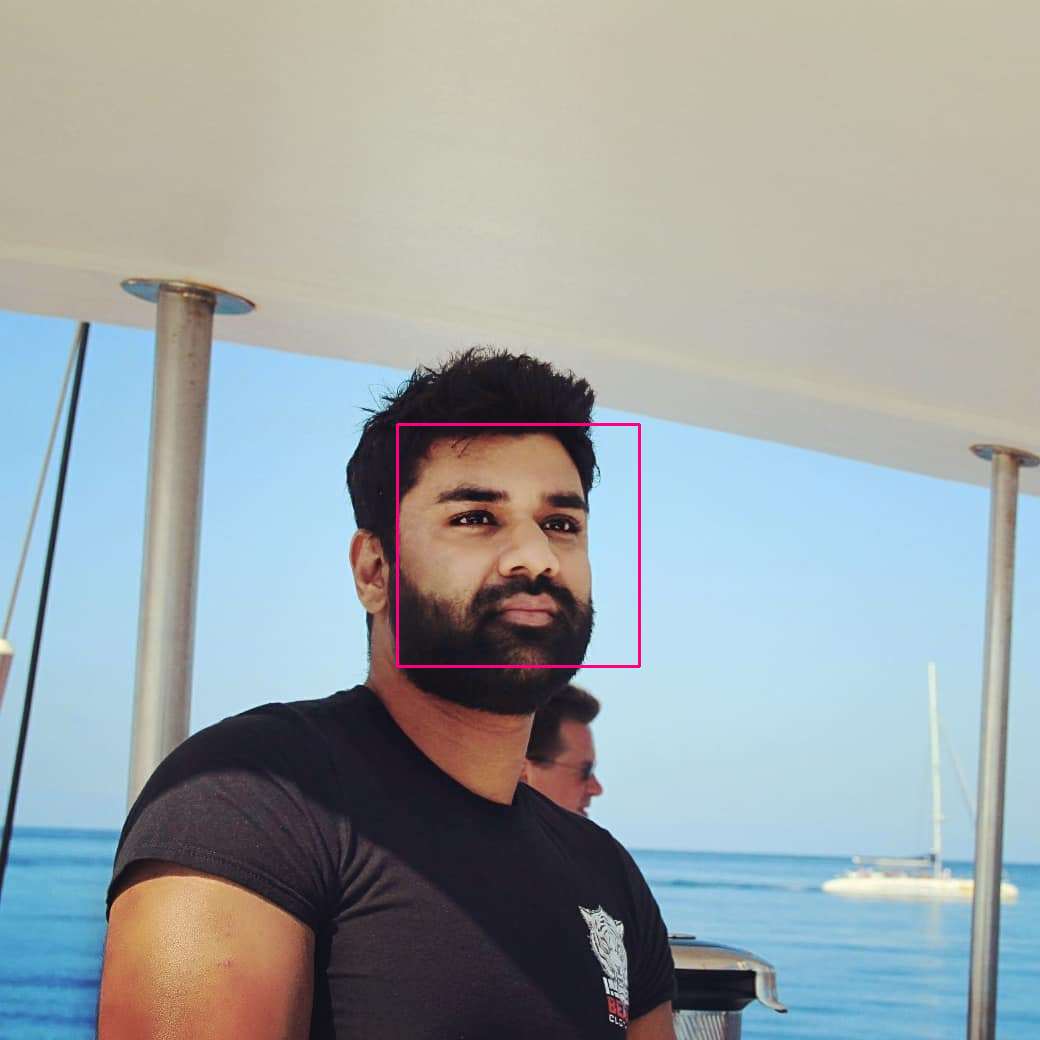

In [ ]:
import numpy as np
from google.colab.patches import cv2_imshow

# We point OpenCV's CascadeClassifier function to where our
# classifier (XML file format) is stored
face_classifier = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')

# Load our image then convert it to grayscale
image = cv2.imread('/content/myself.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Our classifier returns the ROI of the detected face as a tuple
# It stores the top left coordinate and the bottom right coordiantes
faces = face_classifier.detectMultiScale(gray, 1.3, 5)

# When no faces detected, face_classifier returns and empty tuple
if faces is ():
    print("No faces found")

# We iterate through our faces array and draw a rectangle
# over each face in faces
for (x,y,w,h) in faces:
    cv2.rectangle(image, (x,y), (x+w,y+h), (127,0,255), 2)
    cv2_imshow(image)
    cv2.waitKey(0)

cv2.destroyAllWindows()

In [ ]:
import cv2
url2='https://raw.githubusercontent.com/PacktPublishing/Hands-On-Computer-Vision-with-OpenCV-4-Keras-and-TensorFlow-2/master/Section%203/Haarcascades/haarcascade_eye.xml'

urllib.request.urlretrieve(url2, 'haarcascade_eye.xml')
eye_classifier = cv2.CascadeClassifier('/content/haarcascade_eye.xml')



### Let's combine face and eye detection

<>:13: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:13: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-17-69a04c891d0c>:13: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


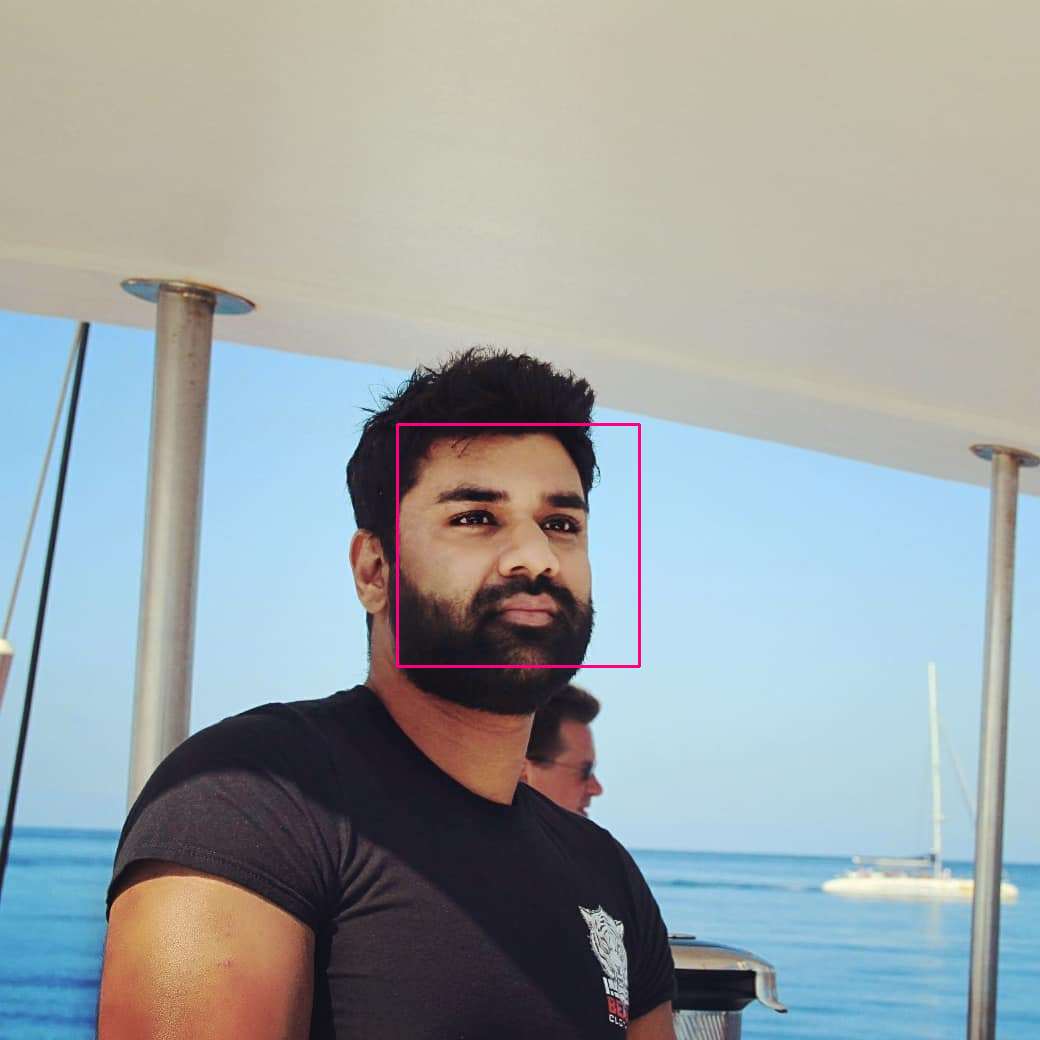

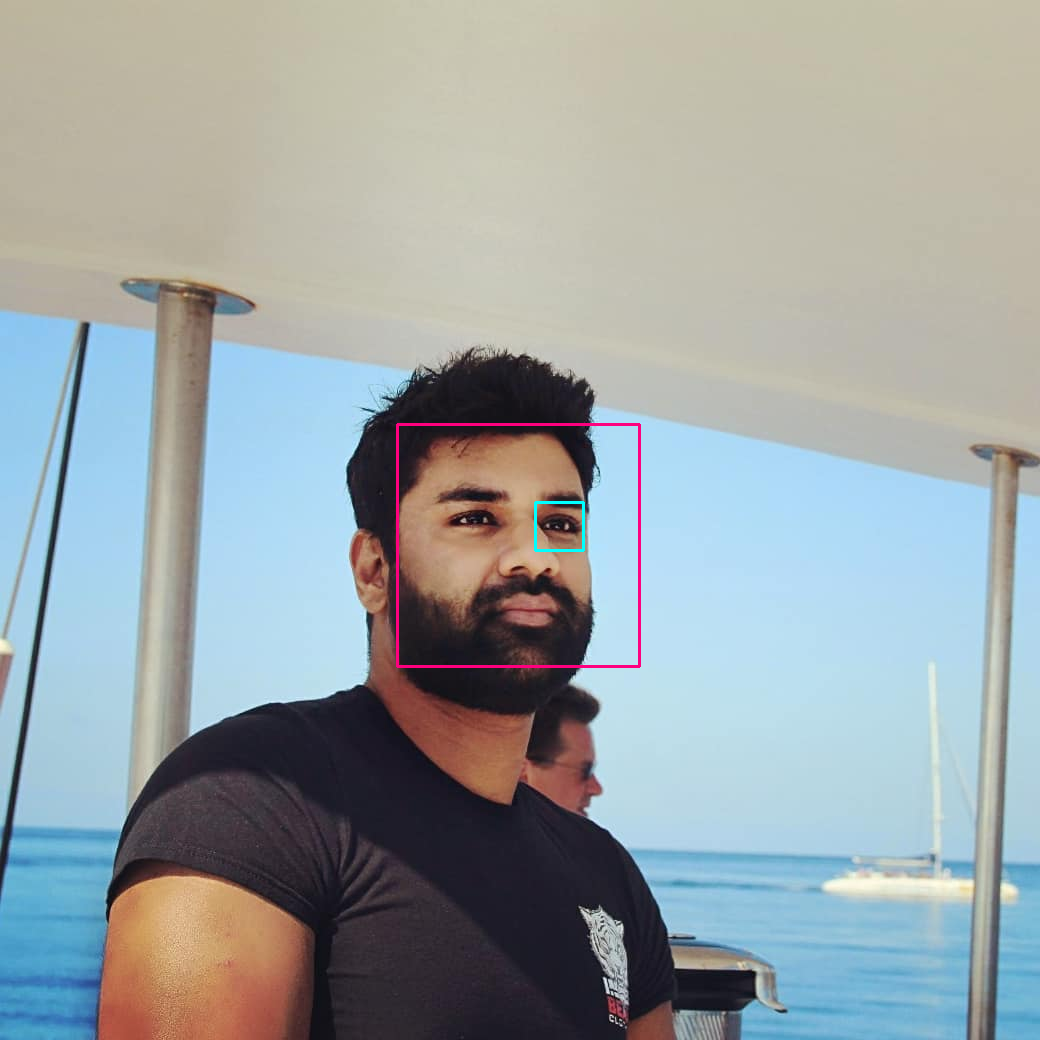

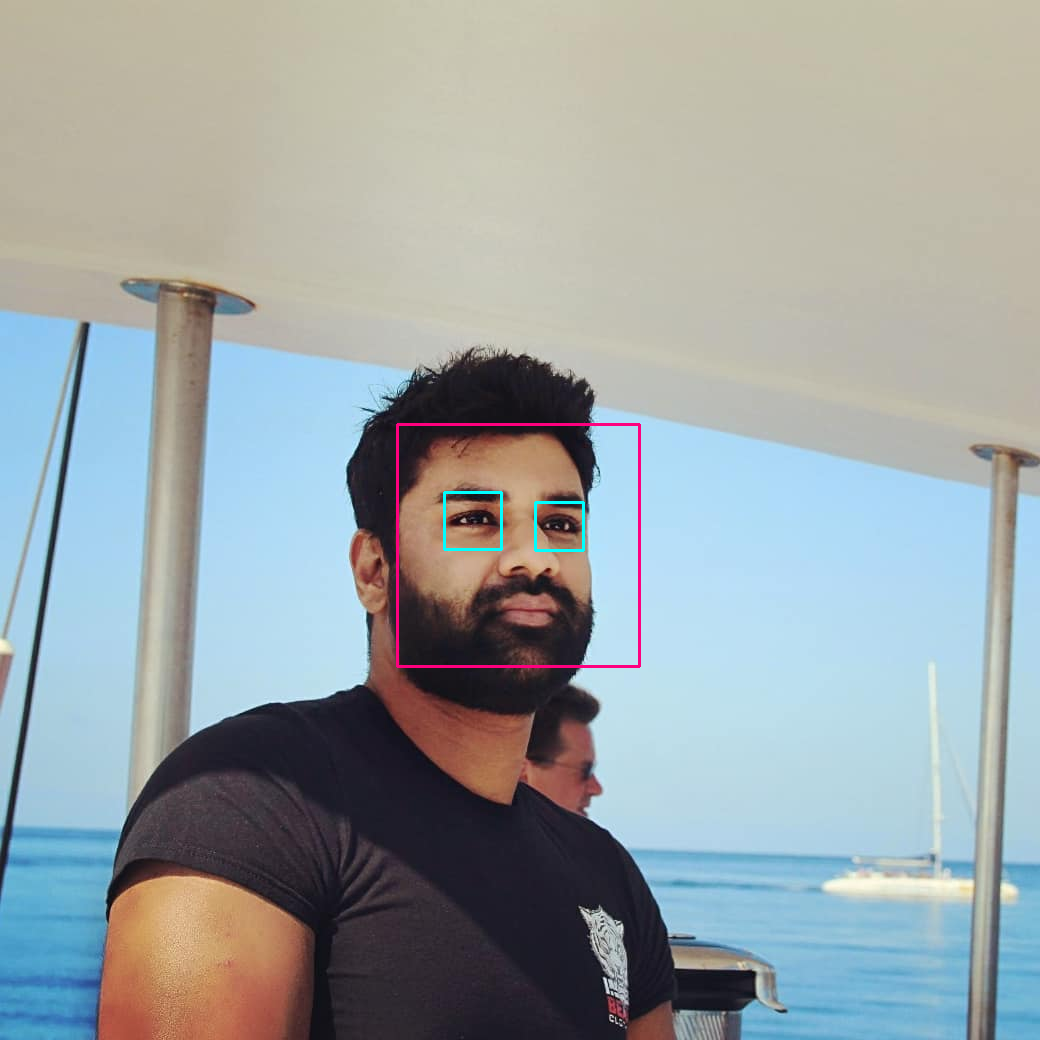

In [ ]:
import numpy as np
import cv2

face_classifier = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('/content/haarcascade_eye.xml')

img = cv2.imread('/content/myself.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_classifier.detectMultiScale(gray, 1.3, 5)

# When no faces detected, face_classifier returns and empty tuple
if faces is ():
    print("No Face Found")

for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(127,0,255),2)
    cv2_imshow(img)
    cv2.waitKey(0)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_classifier.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,255,0),2)
        cv2_imshow(img)
        cv2.waitKey(0)

cv2.destroyAllWindows()


<>:17: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:17: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-18-1954952f8607>:17: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


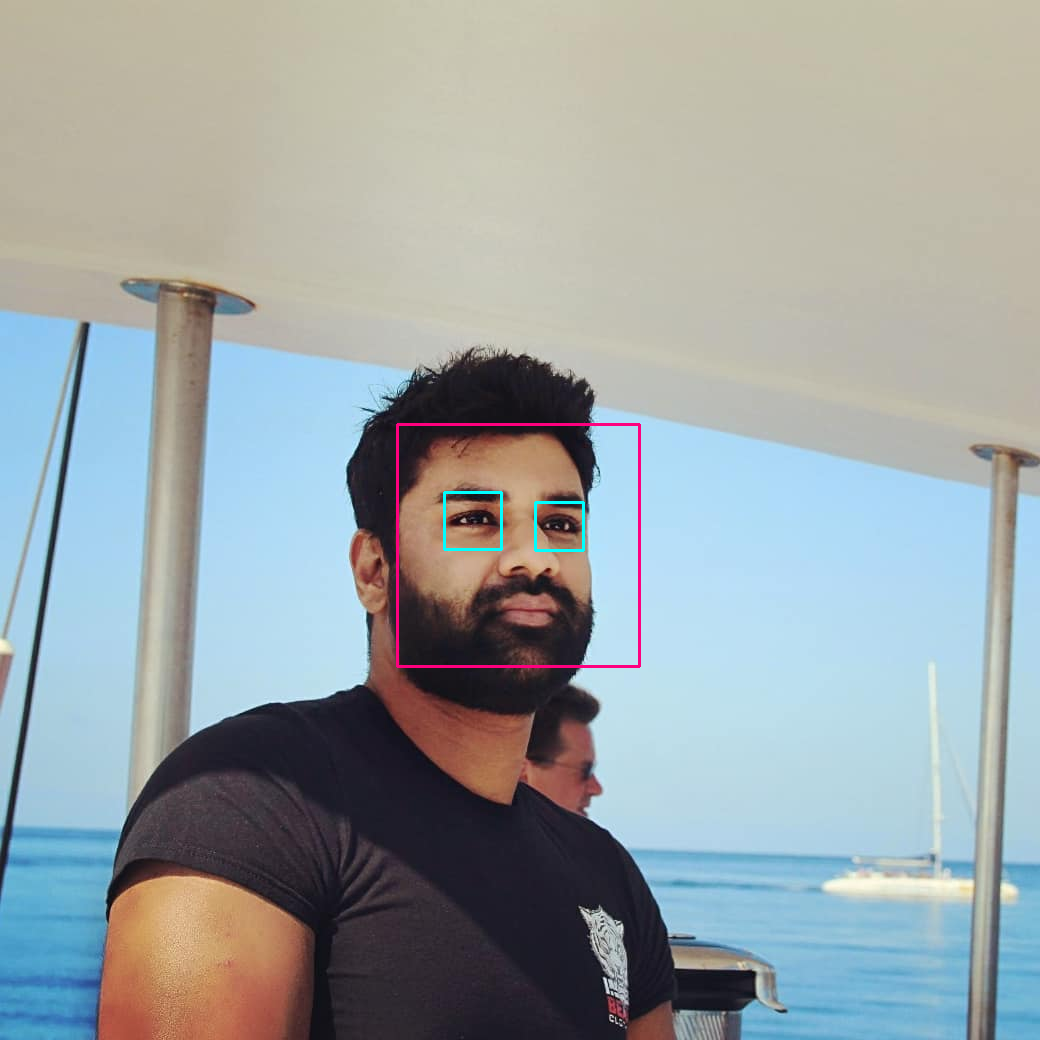

In [ ]:
from google.colab.patches import cv2_imshow

face_classifier = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('/content/haarcascade_eye.xml')

# Check if cascade classifiers are loaded successfully
if face_classifier.empty() or eye_classifier.empty():
    print("Error loading cascade classifiers")
    exit()

img = cv2.imread('/content/myself.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_classifier.detectMultiScale(gray, 1.3, 5)

# When no faces detected, face_classifier returns an empty tuple
if faces is ():
    print("No Face Found")

for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (127, 0, 255), 2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_classifier.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (255, 255, 0), 2)

cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()


### Let's make a live face & eye detection, keeping the face inview at all times

In [ ]:
import cv2
from time import sleep
from google.colab.patches import cv2_imshow

face_classifier = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('/content/haarcascade_eye.xml')


img = cv2.imread('/content/myself.jpg')

def face_detector(img, size=0.5):
    # Convert image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.3, 5)

    if faces == ():
        return img

    for (x, y, w, h) in faces:
        x = x - 50
        w = w + 50
        y = y - 50
        h = h + 50
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_classifier.detectMultiScale(roi_gray)
        sleep(0.05)
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 0, 255), 2)

    img = cv2.flip(img, 1)
    return img

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()

    if not ret or frame is None:
        print("Error reading frame")
        break

    cv2_imshow(face_detector(frame))

    if cv2.waitKey(1) == 13:  # 13 is the Enter Key
        break

cap.release()
cv2.destroyAllWindows()


Error reading frame


# Tuning Cascade Classifiers

*ourClassifier*.**detectMultiScale**(input image, **Scale Factor** , **Min Neighbors**)

- **Scale Factor**
Specifies how much we reduce the image size each time we scale. E.g. in face detection we typically use 1.3. This means we reduce the image by 30% each time it’s scaled. Smaller values, like 1.05 will take longer to compute, but will increase the rate of detection.



- **Min Neighbors**
Specifies the number of neighbors each potential window should have in order to consider it a positive detection. Typically set between 3-6.
It acts as sensitivity setting, low values will sometimes detect multiples faces over a single face. High values will ensure less false positives, but you may miss some faces.  